In [79]:
# Import required libraries for F1 telemetry analysis
import matplotlib as mpl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as ff1
import os

# Configure FastF1 cache - create directory if it doesn't exist
cache_dir = 'f1_cache'
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

ff1.Cache.enable_cache(cache_dir)

# Set global parameters
year = 2025
colormap = mpl.cm.plasma

# 🏎️ Max Verstappen - 2025 F1 Season Analysis

## Comprehensive Telemetry & Performance Analysis

This notebook provides a complete analysis of Max Verstappen's 2025 Formula 1 season, including:

- **Championship Points Tracking** - Race-by-race progression
- **Performance Metrics** - Speed, sectors, consistency analysis
- **Telemetry Visualization** - Speed heatmaps and track analysis

### Data Source
All data is sourced from **FastF1** API, which provides official FIA timing and telemetry data.

---

## Step 1: Load 2025 Season Calendar

Load the complete F1 2025 season schedule to identify all race events.

In [80]:
# Load 2025 season data for Verstappen
import pandas as pd

# Get the complete 2025 season schedule
season = ff1.get_event_schedule(year)
print(f"Total races in {year} season: {len(season)}")
print("\n2025 F1 Calendar:")
print(season[['RoundNumber', 'EventName', 'Country', 'EventDate']])

Total races in 2025 season: 25

2025 F1 Calendar:
    RoundNumber                  EventName               Country  EventDate
0             0         Pre-Season Testing               Bahrain 2025-02-28
1             1      Australian Grand Prix             Australia 2025-03-16
2             2         Chinese Grand Prix                 China 2025-03-23
3             3        Japanese Grand Prix                 Japan 2025-04-06
4             4         Bahrain Grand Prix               Bahrain 2025-04-13
5             5   Saudi Arabian Grand Prix          Saudi Arabia 2025-04-20
6             6           Miami Grand Prix         United States 2025-05-04
7             7  Emilia Romagna Grand Prix                 Italy 2025-05-18
8             8          Monaco Grand Prix                Monaco 2025-05-25
9             9         Spanish Grand Prix                 Spain 2025-06-01
10           10        Canadian Grand Prix                Canada 2025-06-15
11           11        Austrian Grand 

## Step 2: Collect Verstappen's Season Data

Load all race data, results, and telemetry for the entire season

In [81]:
# Collect Verstappen's race data for the entire season - LOAD ALL DATA ONCE
verstappen_data = []
all_telemetry_data = {}  # Store telemetry for each race to avoid reloading

# Iterate through all race events
for index, event in season.iterrows():
    try:
        # Load race session
        race = ff1.get_session(year, event['EventName'], 'R')
        race.load()
        
        # Get Verstappen's results
        ver_laps = race.laps.pick_driver('VER')
        
        if len(ver_laps) > 0:
            # Get race results
            results = race.results
            ver_result = results[results['Abbreviation'] == 'VER']
            
            if len(ver_result) > 0:
                # Extract key metrics
                race_data = {
                    'Round': event['RoundNumber'],
                    'Race': event['EventName'],
                    'Country': event['Country'],
                    'Position': int(ver_result['Position'].values[0]) if not pd.isna(ver_result['Position'].values[0]) else None,
                    'Points': float(ver_result['Points'].values[0]) if not pd.isna(ver_result['Points'].values[0]) else 0,
                    'GridPosition': int(ver_result['GridPosition'].values[0]) if not pd.isna(ver_result['GridPosition'].values[0]) else None,
                    'Status': ver_result['Status'].values[0],
                }
                
                # Get fastest lap info and telemetry
                fastest_lap = ver_laps.pick_fastest()
                if fastest_lap is not None and len(fastest_lap) > 0:
                    telemetry_race = fastest_lap.get_telemetry()
                    race_data['MaxSpeed'] = telemetry_race['Speed'].max()
                    race_data['MinSpeed'] = telemetry_race['Speed'].min()
                    race_data['FastestLapTime'] = fastest_lap['LapTime']
                    
                    # Store telemetry data for heatmap visualizations
                    all_telemetry_data[event['EventName']] = {
                        'telemetry': telemetry_race,
                        'lap': fastest_lap
                    }
                else:
                    race_data['MaxSpeed'] = None
                    race_data['MinSpeed'] = None
                    race_data['FastestLapTime'] = None
                
                verstappen_data.append(race_data)
                print(f"Loaded: {event['EventName']} - P{race_data['Position']}")
        
    except Exception as e:
        continue

# Create DataFrame
df_verstappen = pd.DataFrame(verstappen_data)
df_verstappen.head(10)

events      WARNING 	Correcting user input 'Pre-Season Testing' to 'Singapore Grand Prix'
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
req            INFO 	Using cached data for _extended_timing_

Loaded: Pre-Season Testing - P2


core        WARNING 	Fixed incorrect tyre stint information for driver '87'
core        WARNING 	Fixed incorrect tyre stint information for driver '30'
core        WARNING 	Fixed incorrect tyre stint information for driver '30'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.
core        WARNING 	Driver 4 completed the race di

Loaded: Australian Grand Prix - P2


req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '31', '12', '23', '87', '18', '55', '6', '30', '7', '5', '27', '22', '14', '16', '44', '10']
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '31', 

Loaded: Chinese Grand Prix - P4


req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '44', '6', '23', '87', '14', '22', '10', '55', '7', '27', '30', '31', '5', '18']
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '44', '6', '23', '87', '14', '22', '10', '55', '7', '27', '30', '31', '5', '18']
C:\Users\Alejandro\AppData\Roaming\Py

Loaded: Japanese Grand Prix - P1


req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '5', '55', '27']
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '5', '55', '27']
C:\Users\Alejandro\AppData\Roaming\Py

Loaded: Bahrain Grand Prix - P6


req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']
C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn((

Loaded: Saudi Arabian Grand Prix - P2


req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '31'
core        WARNING 	Fixed incorrect tyre stint information for driver '31'
core        WARNING 	Fixed incorrect tyre stint information for driver '18'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
core        WARNING 	Fixed incorrect tyre stint information for driver '18'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            

Loaded: Miami Grand Prix - P4


req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '44', '23', '16', '63', '55', '6', '22', '14', '27', '10', '30', '18', '43', '87', '5', '12', '31']
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '44', '23',

Loaded: Emilia Romagna Grand Prix - P1


req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '1', '44', '6', '31', '30', '23', '55', '63', '87', '43', '5

Loaded: Monaco Grand Prix - P4


req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['81', '4', '16', '63', '27', '44', '6', '10', '14', '1', '30', '5', '22', '55

Loaded: Spanish Grand Prix - P10


req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16'

Loaded: Canadian Grand Prix - P2


req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached 

Loaded: Austrian Grand Prix - P18


req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
req            INFO 	Using cached data for race_control_messages
core           INFO 	Fi

Loaded: British Grand Prix - P5


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to ca

Loaded: Belgian Grand Prix - P4


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching

Loaded: Hungarian Grand Prix - P9


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching

Loaded: Dutch Grand Prix - P2


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching

Loaded: Italian Grand Prix - P1


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching

Loaded: Azerbaijan Grand Prix - P1


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached dat

Loaded: Singapore Grand Prix - P2


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core        WARNING 	Failed to load extended driver information!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading 

,Round,Race,Country,Position,Points,GridPosition,Status,MaxSpeed,MinSpeed,FastestLapTime
0,0,Pre-Season Testing,Bahrain,2,18.0,2,Finished,289.0,62.0,0 days 00:01:35.649000
1,1,Australian Grand Prix,Australia,2,18.0,3,Finished,304.0,88.0,0 days 00:01:23.081000
2,2,Chinese Grand Prix,China,4,12.0,4,Finished,315.0,58.0,0 days 00:01:35.488000
3,3,Japanese Grand Prix,Japan,1,25.0,1,Finished,313.0,66.0,0 days 00:01:31.041000
4,4,Bahrain Grand Prix,Bahrain,6,8.0,7,Finished,335.0,54.0,0 days 00:01:36.167000
5,5,Saudi Arabian Grand Prix,Saudi Arabia,2,18.0,1,Finished,331.0,81.0,0 days 00:01:32.280000
6,6,Miami Grand Prix,United States,4,12.0,1,Finished,319.0,69.0,0 days 00:01:30.466000
7,7,Emilia Romagna Grand Prix,Italy,1,25.0,2,Finished,304.0,98.0,0 days 00:01:17.988000
8,8,Monaco Grand Prix,Monaco,4,12.0,4,Finished,286.0,48.0,0 days 00:01:14.230000
9,9,Spanish Grand Prix,Spain,10,1.0,3,Finished,313.0,97.0,0 days 00:01:17.019000


## Visualization 1A: Championship Points Evolution

Track Verstappen's championship points accumulation throughout the 2025 season.

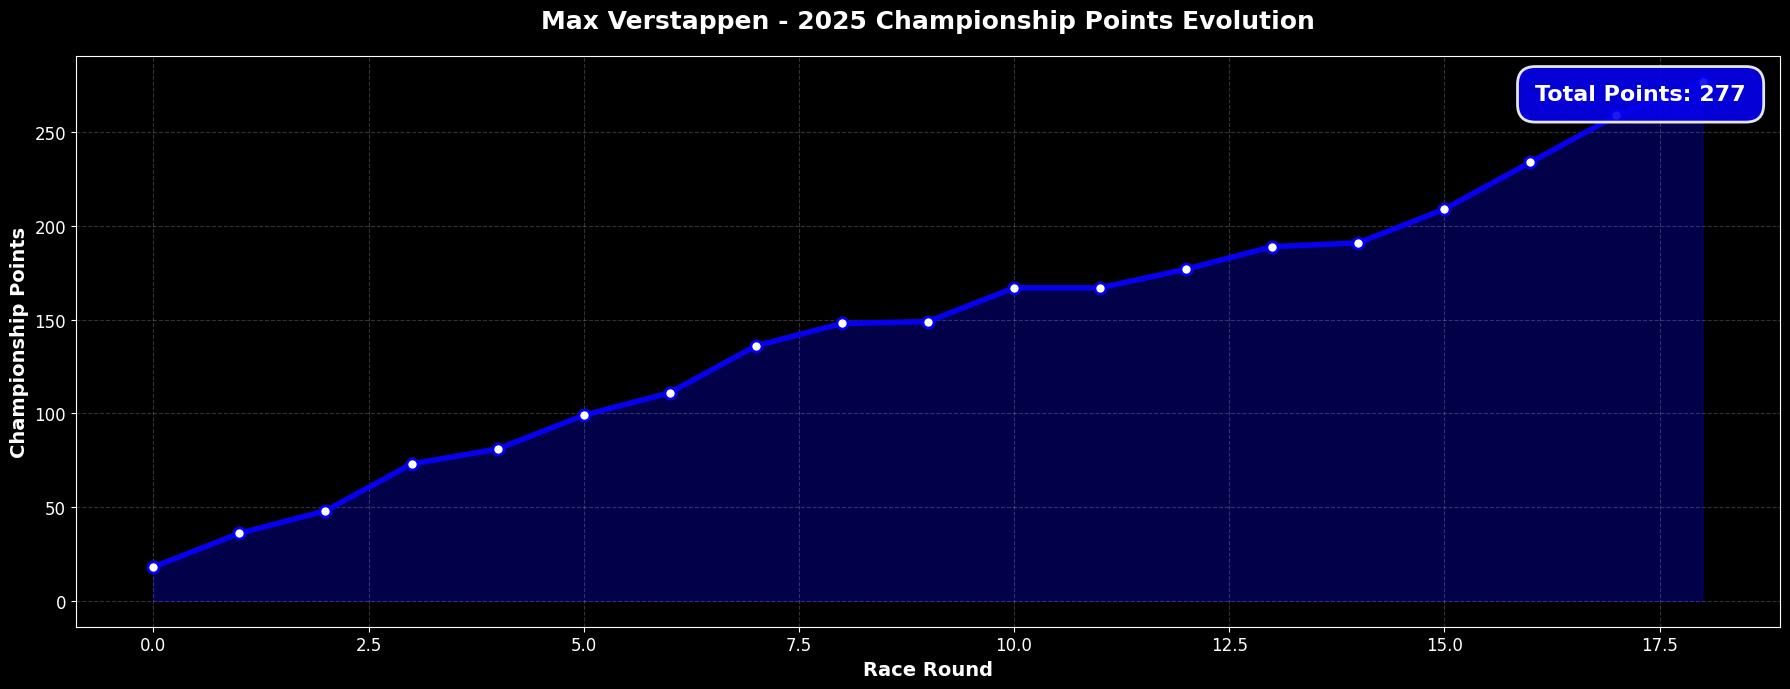

In [82]:
# Calculate cumulative points
df_verstappen['CumulativePoints'] = df_verstappen['Points'].cumsum()

# Define helper function for position colors
def get_position_color(position):
    if position == 1:
        return '#FFD700'  # Gold for wins
    elif position == 2:
        return '#C0C0C0'  # Silver for P2
    elif position == 3:
        return '#CD7F32'  # Bronze for P3
    elif position <= 10:
        return '#0600EF'  # Red Bull blue for points
    else:
        return '#666666'  # Gray for outside points

# Create Points Evolution visualization
fig, ax = plt.subplots(figsize=(18, 7), facecolor='black')
ax.set_facecolor('black')

ax.plot(df_verstappen['Round'], df_verstappen['CumulativePoints'], 
         color='#0600EF', linewidth=4, marker='o', markersize=8, 
         markerfacecolor='white', markeredgecolor='#0600EF', markeredgewidth=2)
ax.fill_between(df_verstappen['Round'], df_verstappen['CumulativePoints'], 
                alpha=0.3, color='#0600EF')

ax.set_xlabel('Race Round', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('Championship Points', fontsize=14, color='white', fontweight='bold')
ax.set_title('Max Verstappen - 2025 Championship Points Evolution', 
             fontsize=18, color='white', fontweight='bold', pad=20)

ax.grid(True, alpha=0.2, color='white', linestyle='--')
ax.tick_params(colors='white', labelsize=12)

# Add current total points annotation
total_points = df_verstappen['CumulativePoints'].iloc[-1]
ax.text(0.98, 0.95, f'Total Points: {int(total_points)}', 
        transform=ax.transAxes, fontsize=16, color='white', fontweight='bold',
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='#0600EF', 
                  edgecolor='white', linewidth=2, alpha=0.9))

for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.show()

## Visualization 1B: Position Distribution

Bar chart showing how many times Verstappen finished in each position.

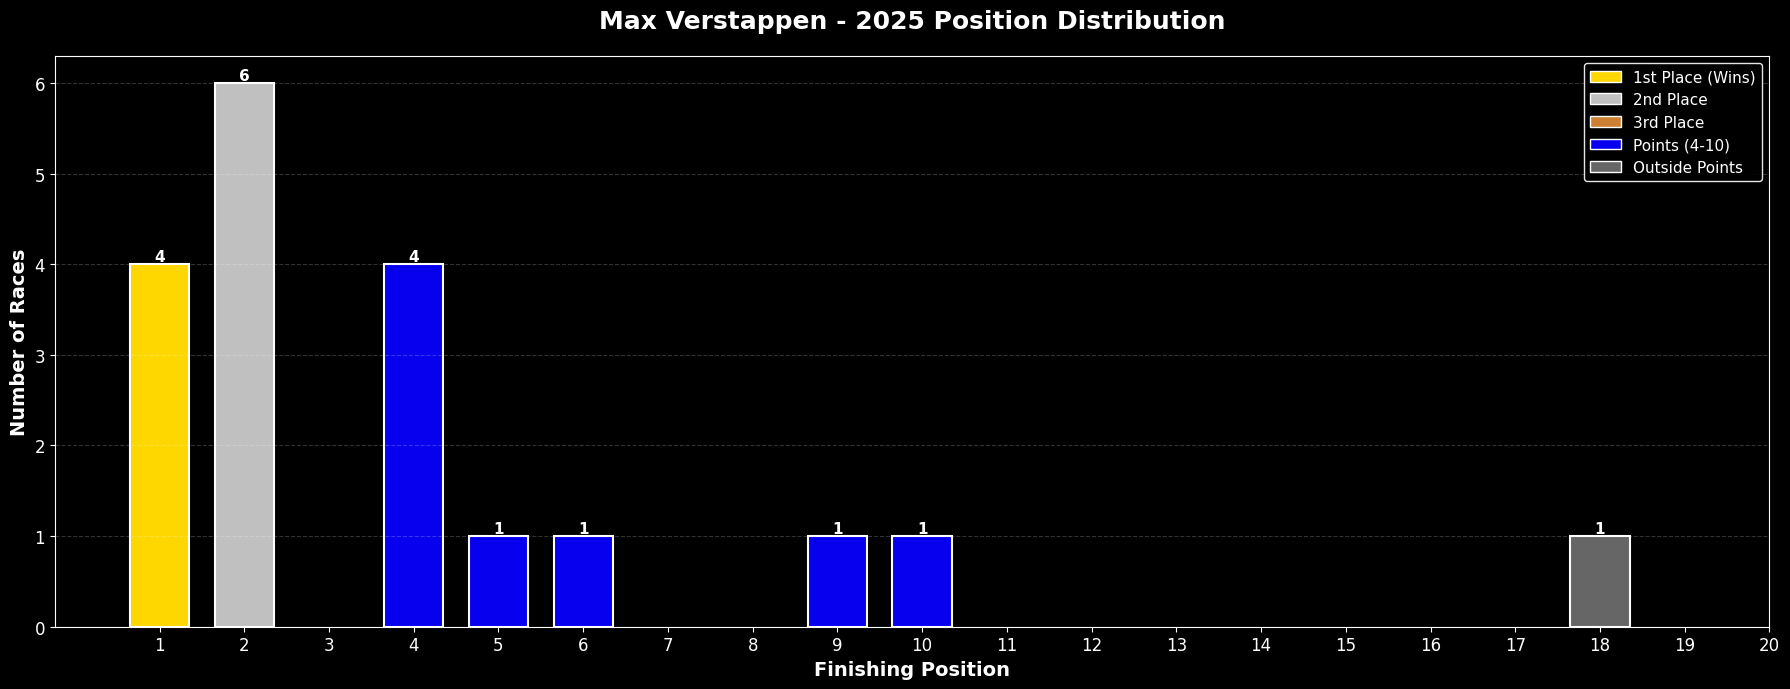

Position Distribution: 4 wins, 10 podiums


In [83]:
# Count positions
position_counts = df_verstappen['Position'].value_counts().sort_index()

# Create Position Distribution visualization
fig, ax = plt.subplots(figsize=(18, 7), facecolor='black')
ax.set_facecolor('black')

bars = ax.bar(position_counts.index, position_counts.values, 
              color=[get_position_color(pos) for pos in position_counts.index],
              edgecolor='white', linewidth=1.5, width=0.7)

ax.set_xlabel('Finishing Position', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('Number of Races', fontsize=14, color='white', fontweight='bold')
ax.set_title('Max Verstappen - 2025 Position Distribution', 
             fontsize=18, color='white', fontweight='bold', pad=20)

ax.grid(True, alpha=0.2, color='white', linestyle='--', axis='y')
ax.tick_params(colors='white', labelsize=12)
ax.set_xticks(range(1, 21))

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', color='white', fontsize=11, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFD700', edgecolor='white', label='1st Place (Wins)'),
    Patch(facecolor='#C0C0C0', edgecolor='white', label='2nd Place'),
    Patch(facecolor='#CD7F32', edgecolor='white', label='3rd Place'),
    Patch(facecolor='#0600EF', edgecolor='white', label='Points (4-10)'),
    Patch(facecolor='#666666', edgecolor='white', label='Outside Points')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11, 
          facecolor='black', edgecolor='white', framealpha=0.9, labelcolor='white')

for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.show()

wins = (df_verstappen['Position'] == 1).sum()
podiums = (df_verstappen['Position'] <= 3).sum()
print(f"Position Distribution: {wins} wins, {podiums} podiums")

## Visualization 1C: Grid vs Race Performance

Comparison of grid positions and race finishing positions to show performance gains/losses.

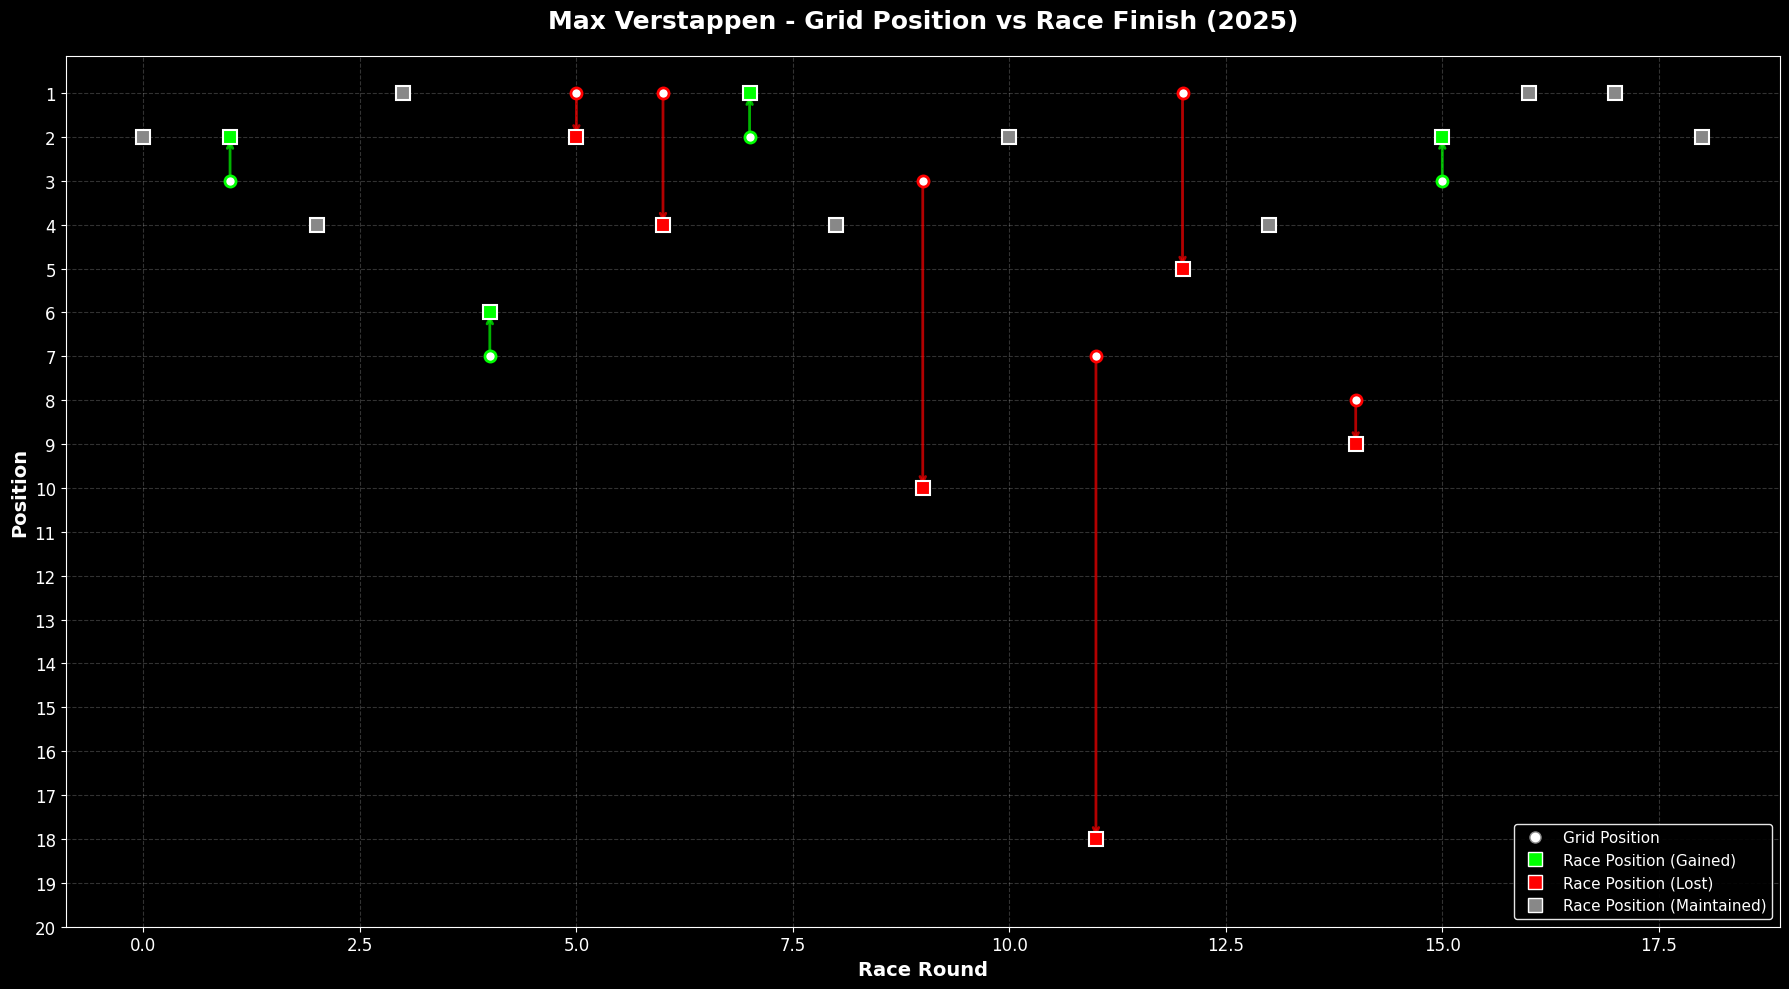

Grid vs Race: -23 total positions, Avg Grid: 3.0, Avg Finish: 4.2


In [84]:
# Create Grid vs Race Performance visualization
fig, ax = plt.subplots(figsize=(18, 10), facecolor='black')
ax.set_facecolor('black')

for idx, row in df_verstappen.iterrows():
    grid_pos = row['GridPosition']
    race_pos = row['Position']
    round_num = row['Round']
    
    # Determine arrow color based on performance
    if race_pos < grid_pos:
        color = '#00FF00'  # Green for positions gained
        label = 'Gained Positions'
    elif race_pos > grid_pos:
        color = '#FF0000'  # Red for positions lost
        label = 'Lost Positions'
    else:
        color = '#888888'  # Gray for maintained position
        label = 'Maintained Position'
    
    # Draw arrow from grid to race position
    ax.annotate('', xy=(round_num, race_pos), xytext=(round_num, grid_pos),
                arrowprops=dict(arrowstyle='->', color=color, lw=2, alpha=0.7))
    
    # Mark grid position (start)
    ax.plot(round_num, grid_pos, 'o', color='white', markersize=8, 
            markeredgecolor=color, markeredgewidth=2, zorder=3)
    
    # Mark race position (end) 
    ax.plot(round_num, race_pos, 's', color=color, markersize=10, 
            markeredgecolor='white', markeredgewidth=1.5, zorder=4)

ax.set_xlabel('Race Round', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('Position', fontsize=14, color='white', fontweight='bold')
ax.set_title('Max Verstappen - Grid Position vs Race Finish (2025)', 
             fontsize=18, color='white', fontweight='bold', pad=20)

ax.invert_yaxis()  # Invert so P1 is at top
ax.grid(True, alpha=0.2, color='white', linestyle='--')
ax.tick_params(colors='white', labelsize=12)
ax.set_yticks(range(1, 21))

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='white', 
           markeredgecolor='#888888', markersize=8, label='Grid Position', linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#00FF00', 
           markeredgecolor='white', markersize=10, label='Race Position (Gained)', linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#FF0000', 
           markeredgecolor='white', markersize=10, label='Race Position (Lost)', linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#888888', 
           markeredgecolor='white', markersize=10, label='Race Position (Maintained)', linestyle='None'),
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11, 
          facecolor='black', edgecolor='white', framealpha=0.9, labelcolor='white')

for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.show()

# Calculate statistics
positions_gained = (df_verstappen['GridPosition'] - df_verstappen['Position']).sum()
avg_grid = df_verstappen['GridPosition'].mean()
avg_race = df_verstappen['Position'].mean()
print(f"Grid vs Race: {positions_gained:+.0f} total positions, Avg Grid: {avg_grid:.1f}, Avg Finish: {avg_race:.1f}")

## Season Statistics Table

Comprehensive statistics summary for the 2025 season.

In [85]:
# Calculate comprehensive season statistics
stats_dict = {
    'Metric': [
        'Total Races',
        'Total Points',
        'Average Points per Race',
        'Wins (P1)',
        'Podiums (P1-P3)',
        'Points Finishes (P1-P10)',
        'Win Rate (%)',
        'Podium Rate (%)',
        'Points Rate (%)',
        'Average Qualifying Position',
        'Average Race Finish',
        'Positions Gained (avg)',
        'DNFs / Retirements',
        'Best Finish',
        'Worst Finish',
        'Fastest Laps',
    ],
    'Value': []
}

total_races = len(df_verstappen)
total_points = df_verstappen['Points'].sum()
avg_points = df_verstappen['Points'].mean()
wins = (df_verstappen['Position'] == 1).sum()
podiums = (df_verstappen['Position'] <= 3).sum()
points_finishes = (df_verstappen['Position'] <= 10).sum()
win_rate = (wins / total_races * 100) if total_races > 0 else 0
podium_rate = (podiums / total_races * 100) if total_races > 0 else 0
points_rate = (points_finishes / total_races * 100) if total_races > 0 else 0
avg_grid = df_verstappen['GridPosition'].mean()
avg_finish = df_verstappen['Position'].mean()
avg_positions_gained = (df_verstappen['GridPosition'] - df_verstappen['Position']).mean()
dnfs = df_verstappen[df_verstappen['Status'] != 'Finished'].shape[0]
best_finish = df_verstappen['Position'].min()
worst_finish = df_verstappen['Position'].max()

# Count fastest laps (if FastestLapTime is not null and is the minimum for that race)
fastest_laps = 0
for round_num in df_verstappen['Round'].unique():
    race_data = df_verstappen[df_verstappen['Round'] == round_num]
    if pd.notna(race_data['FastestLapTime'].iloc[0]):
        fastest_laps += 1  # Simplified - would need full grid data to verify

stats_dict['Value'] = [
    total_races,
    f"{int(total_points)}",
    f"{avg_points:.2f}",
    wins,
    podiums,
    points_finishes,
    f"{win_rate:.1f}%",
    f"{podium_rate:.1f}%",
    f"{points_rate:.1f}%",
    f"{avg_grid:.2f}",
    f"{avg_finish:.2f}",
    f"{avg_positions_gained:+.2f}",
    dnfs,
    f"P{int(best_finish)}",
    f"P{int(worst_finish)}",
    f"{fastest_laps} (recorded)"
]

stats_df = pd.DataFrame(stats_dict)

# Display with styling
print("\n" + "="*60)
print("MAX VERSTAPPEN - 2025 SEASON STATISTICS")
print("="*60 + "\n")
print(stats_df.to_string(index=False))
print("\n" + "="*60)


MAX VERSTAPPEN - 2025 SEASON STATISTICS

                     Metric         Value
                Total Races            19
               Total Points           277
    Average Points per Race         14.58
                  Wins (P1)             4
            Podiums (P1-P3)            10
   Points Finishes (P1-P10)            18
               Win Rate (%)         21.1%
            Podium Rate (%)         52.6%
            Points Rate (%)         94.7%
Average Qualifying Position          3.00
        Average Race Finish          4.21
     Positions Gained (avg)         -1.21
         DNFs / Retirements             1
                Best Finish            P1
               Worst Finish           P18
               Fastest Laps 18 (recorded)



## Visualization 2: Detailed Circuit Heatmap

Dual-panel speed and throttle analysis for the fastest circuit.

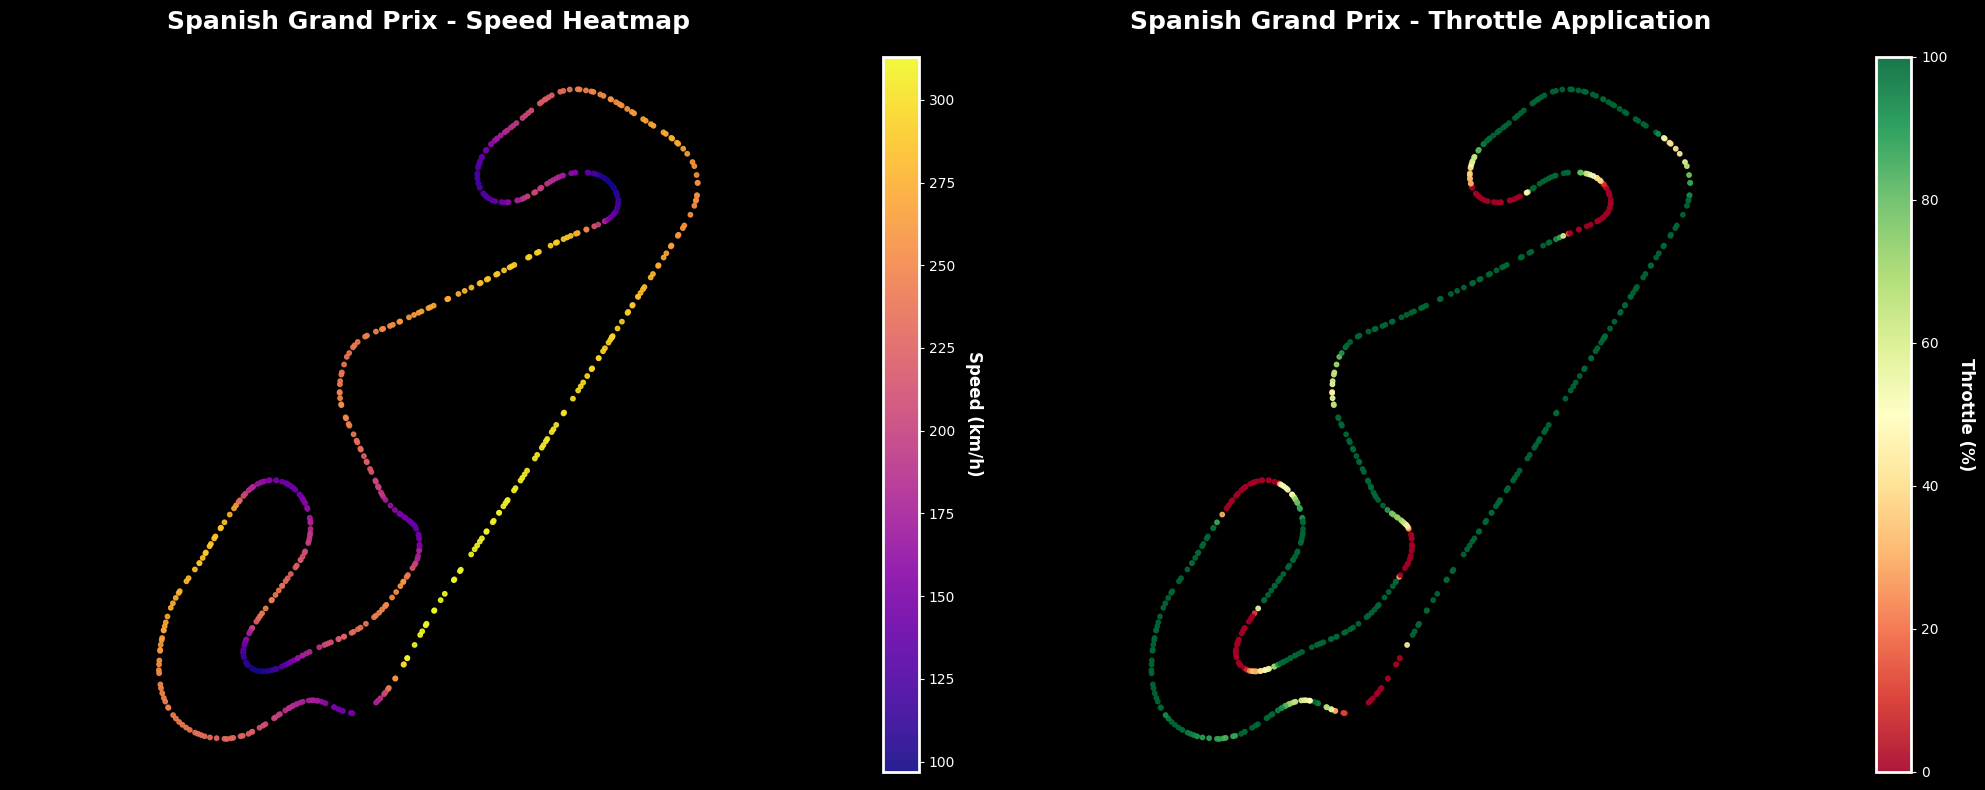


TELEMETRY STATISTICS - Spanish Grand Prix
Lap Time:      00:01:17.019000
Max Speed:     313.0 km/h
Min Speed:     97.0 km/h
Avg Speed:     218.0 km/h



In [86]:
# Create detailed heatmap for a specific circuit

# ========================================
# SELECT YOUR GRAND PRIX HERE
# ========================================
# - 'Pre-Season Testing'
# - 'Australian Grand Prix'
# - 'Chinese Grand Prix'
# - 'Japanese Grand Prix'
# - 'Bahrain Grand Prix'  
# - 'Saudi Arabian Grand Prix'
# - 'Miami Grand Prix'
# - 'Emilia Romagna Grand Prix'
# - 'Monaco Grand Prix'  
# - 'Spanish Grand Prix'
# - 'Canadian Grand Prix'
# - 'British Grand Prix'
# - 'Singapore Grand Prix'

selected_race = 'Spanish Grand Prix'  # <-- Change the name of the GP

# ========================================

# Check if we have preloaded telemetry data
if selected_race in all_telemetry_data:
    try:
        # Use preloaded telemetry data
        tel_detail = all_telemetry_data[selected_race]['telemetry']
        fastest_detail = all_telemetry_data[selected_race]['lap']
        
        # Calculate statistics for display
        max_speed_stat = tel_detail['Speed'].max()
        min_speed_stat = tel_detail['Speed'].min()
        avg_speed_stat = tel_detail['Speed'].mean()
        lap_time = fastest_detail['LapTime']
        lap_time_str = str(lap_time).split(' ')[-1] if pd.notna(lap_time) else 'N/A'
        
        # Create figure with two subplots (side by side)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), facecolor='black')
        
        # Left plot: Speed heatmap
        ax1.set_facecolor('black')
        scatter1 = ax1.scatter(tel_detail['X'], tel_detail['Y'], 
                              c=tel_detail['Speed'], cmap=colormap, 
                              s=10, alpha=0.9)
        ax1.set_title(f'{selected_race} - Speed Heatmap', 
                     fontsize=18, color='white', fontweight='bold', pad=20)
        ax1.axis('equal')
        ax1.axis('off')
        
        # Colorbar for speed
        cbar1 = plt.colorbar(scatter1, ax=ax1, fraction=0.046, pad=0.04, 
                            orientation='vertical')
        cbar1.set_label('Speed (km/h)', fontsize=12, color='white', 
                       fontweight='bold', rotation=270, labelpad=20)
        cbar1.ax.tick_params(labelsize=10, colors='white')
        cbar1.outline.set_edgecolor('white')
        cbar1.outline.set_linewidth(2)
        
        # Right plot: Throttle heatmap
        ax2.set_facecolor('black')
        scatter2 = ax2.scatter(tel_detail['X'], tel_detail['Y'], 
                              c=tel_detail['Throttle'], cmap='RdYlGn', 
                              s=10, alpha=0.9, vmin=0, vmax=100)
        ax2.set_title(f'{selected_race} - Throttle Application', 
                     fontsize=18, color='white', fontweight='bold', pad=20)
        ax2.axis('equal')
        ax2.axis('off')
        
        # Colorbar for throttle
        cbar2 = plt.colorbar(scatter2, ax=ax2, fraction=0.046, pad=0.04, 
                            orientation='vertical')
        cbar2.set_label('Throttle (%)', fontsize=12, color='white', 
                       fontweight='bold', rotation=270, labelpad=20)
        cbar2.ax.tick_params(labelsize=10, colors='white')
        cbar2.outline.set_edgecolor('white')
        cbar2.outline.set_linewidth(2)
        
        plt.tight_layout()
        plt.show()
        
        # Display statistics below the visualization
        print("\n" + "="*80)
        print(f"TELEMETRY STATISTICS - {selected_race}")
        print("="*80)
        print(f"Lap Time:      {lap_time_str}")
        print(f"Max Speed:     {max_speed_stat:.1f} km/h")
        print(f"Min Speed:     {min_speed_stat:.1f} km/h")
        print(f"Avg Speed:     {avg_speed_stat:.1f} km/h")
        print("="*80 + "\n")

    except Exception as e:
        print(f"Error al crear heatmap: {str(e)}")
else:
    print(f"\nCarreras disponibles:")
    for i, race in enumerate(all_telemetry_data.keys(), 1):
        print(f"   {i}. {race}")

## Visualization 3: Multi-Circuit Heatmap Grid

Speed heatmaps across all circuits showing fastest lap performance.

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_15756\1385969159.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 0.99])


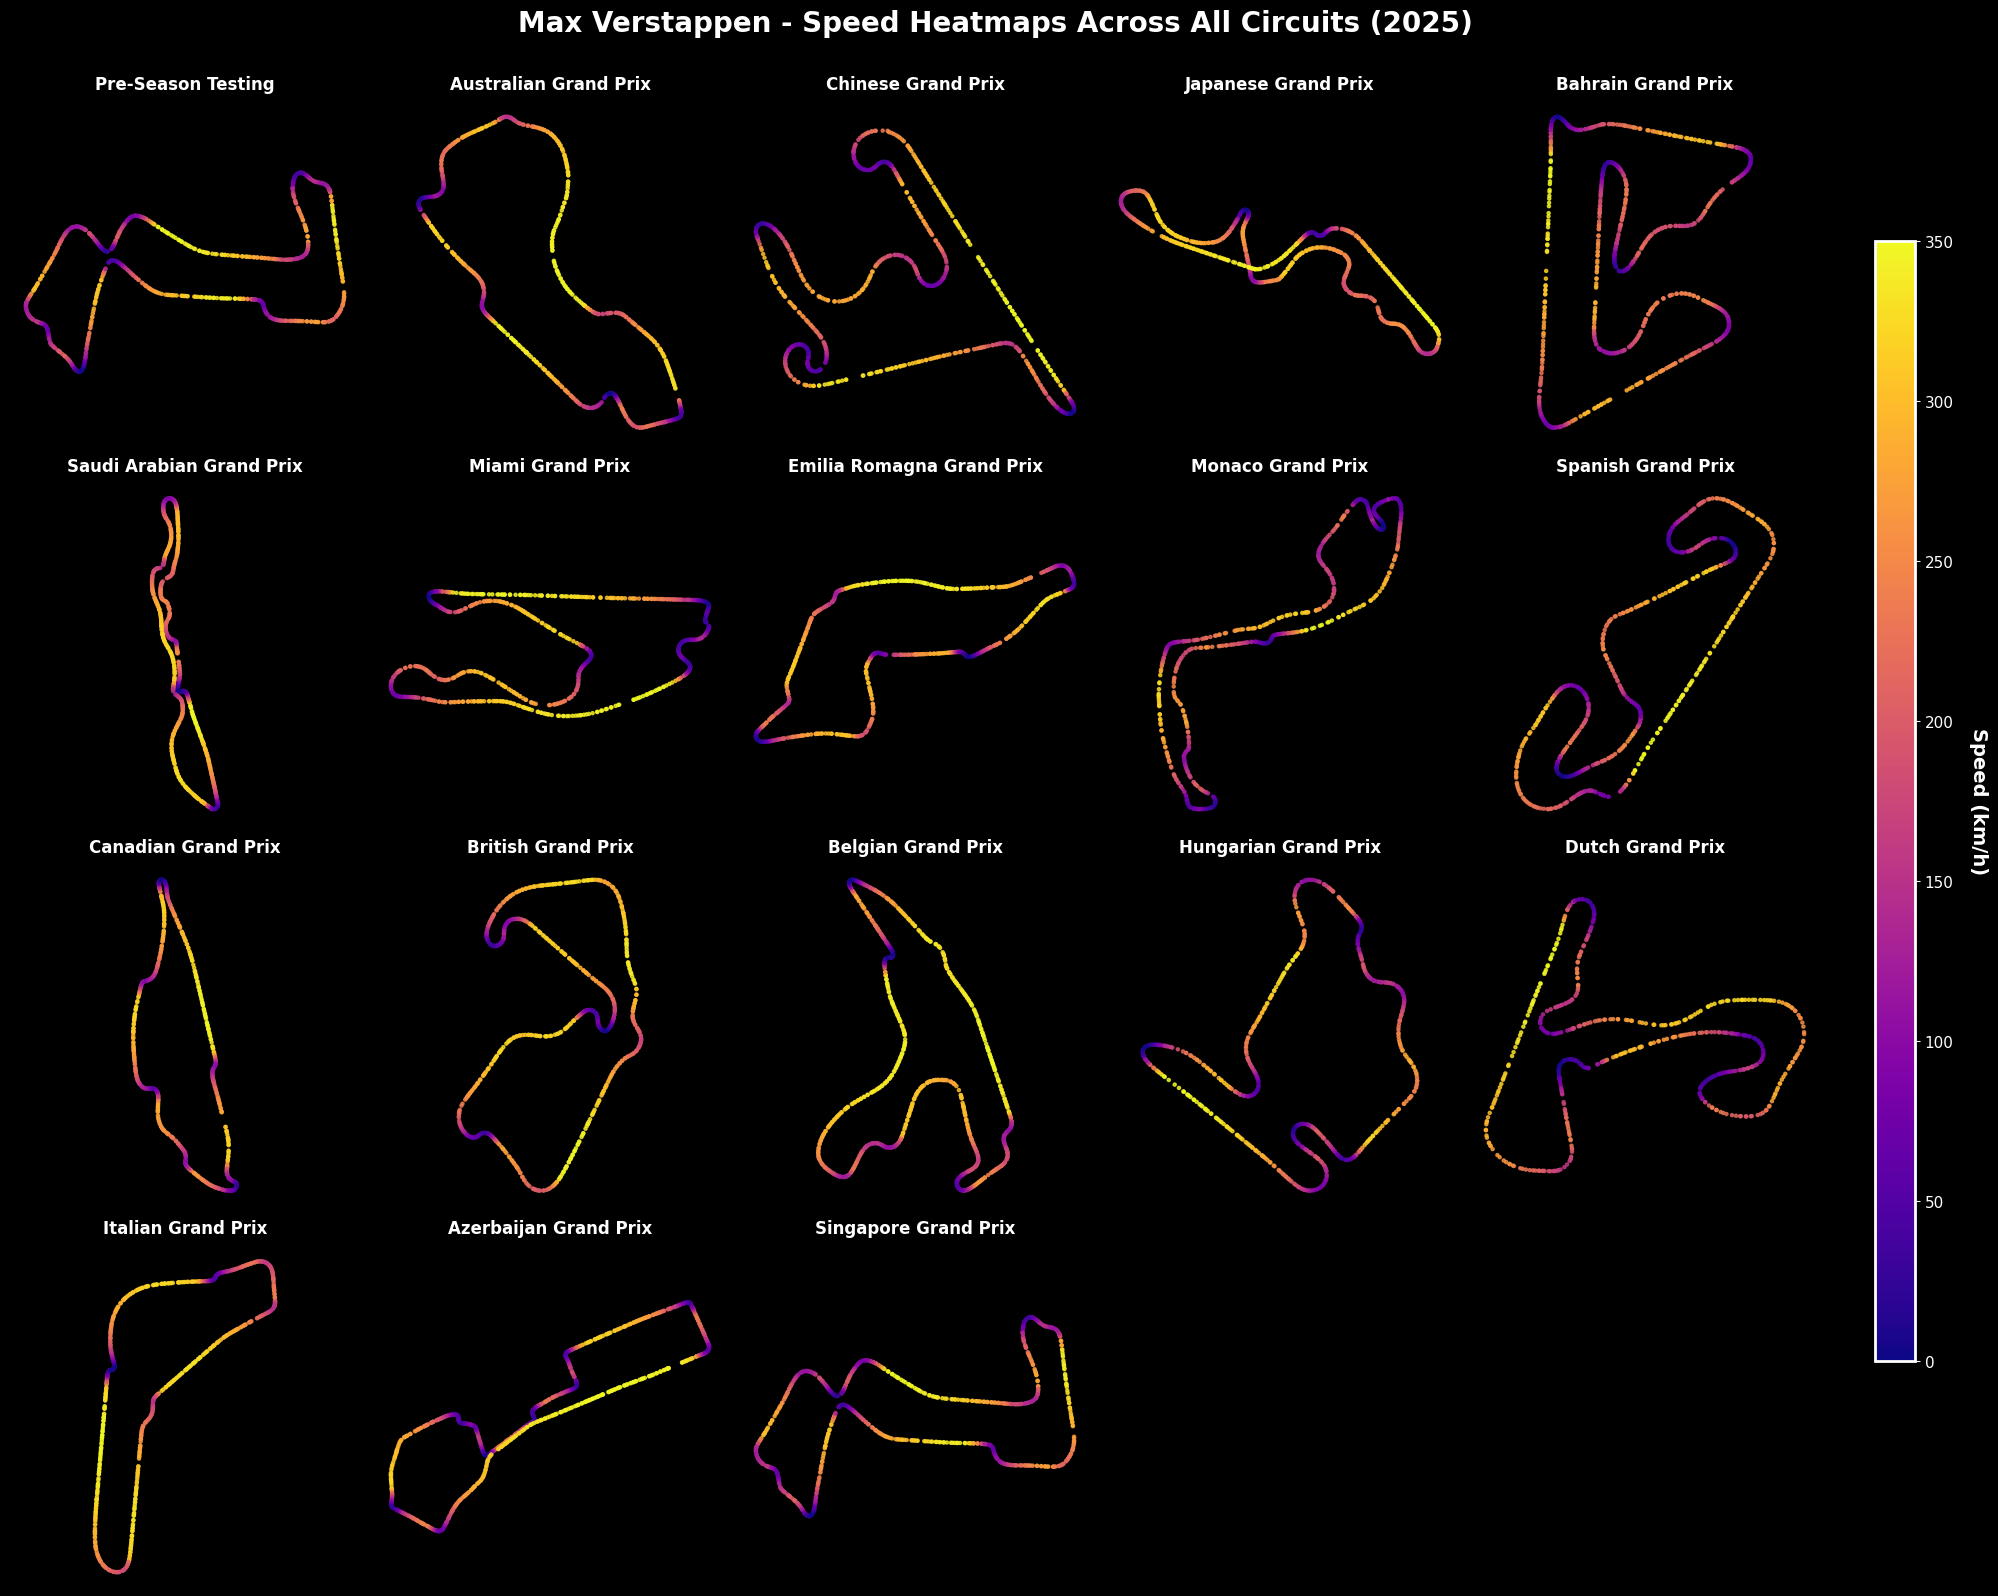

In [87]:
# Create multi-circuit speed heatmap grid
num_circuits = len(all_telemetry_data)

if num_circuits > 0:
    # Calculate grid dimensions (try to make it roughly square)
    cols = int(np.ceil(np.sqrt(num_circuits)))
    rows = int(np.ceil(num_circuits / cols))
    
    # Create figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4), facecolor='black')
    fig.suptitle('Max Verstappen - Speed Heatmaps Across All Circuits (2025)', 
                 fontsize=20, color='white', fontweight='bold', y=0.995)
    
    # Flatten axes array for easier iteration
    if num_circuits == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if rows > 1 else axes
    
    # Plot each circuit
    for idx, (race_name, data) in enumerate(all_telemetry_data.items()):
        if idx < len(axes):
            ax = axes[idx]
            ax.set_facecolor('black')
            
            try:
                tel = data['telemetry']
                
                # Create speed heatmap
                scatter = ax.scatter(tel['X'], tel['Y'], 
                                    c=tel['Speed'], cmap=colormap, 
                                    s=5, alpha=0.8)
                
                ax.set_title(race_name, fontsize=12, color='white', 
                            fontweight='bold', pad=10)
                ax.axis('equal')
                ax.axis('off')
                
            except Exception as e:
                ax.text(0.5, 0.5, f'{race_name}\nNo data', 
                       transform=ax.transAxes, ha='center', va='center',
                       fontsize=10, color='white')
                ax.axis('off')
    
    # Hide any unused subplots
    for idx in range(num_circuits, len(axes)):
        axes[idx].axis('off')
    
    # Add a single colorbar for all subplots
    fig.subplots_adjust(right=0.92)
    cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
    norm = plt.Normalize(vmin=0, vmax=350)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
    cbar.set_label('Speed (km/h)', fontsize=14, color='white', 
                   fontweight='bold', rotation=270, labelpad=25)
    cbar.ax.tick_params(labelsize=11, colors='white')
    cbar.outline.set_edgecolor('white')
    cbar.outline.set_linewidth(2)
    
    plt.tight_layout(rect=[0, 0, 0.92, 0.99])
    plt.show()
else:
    print("No telemetry data available")

## Visualization 4: Sector Time Analysis

Professional-level sector breakdown showing performance in S1, S2, and S3 across all circuits.

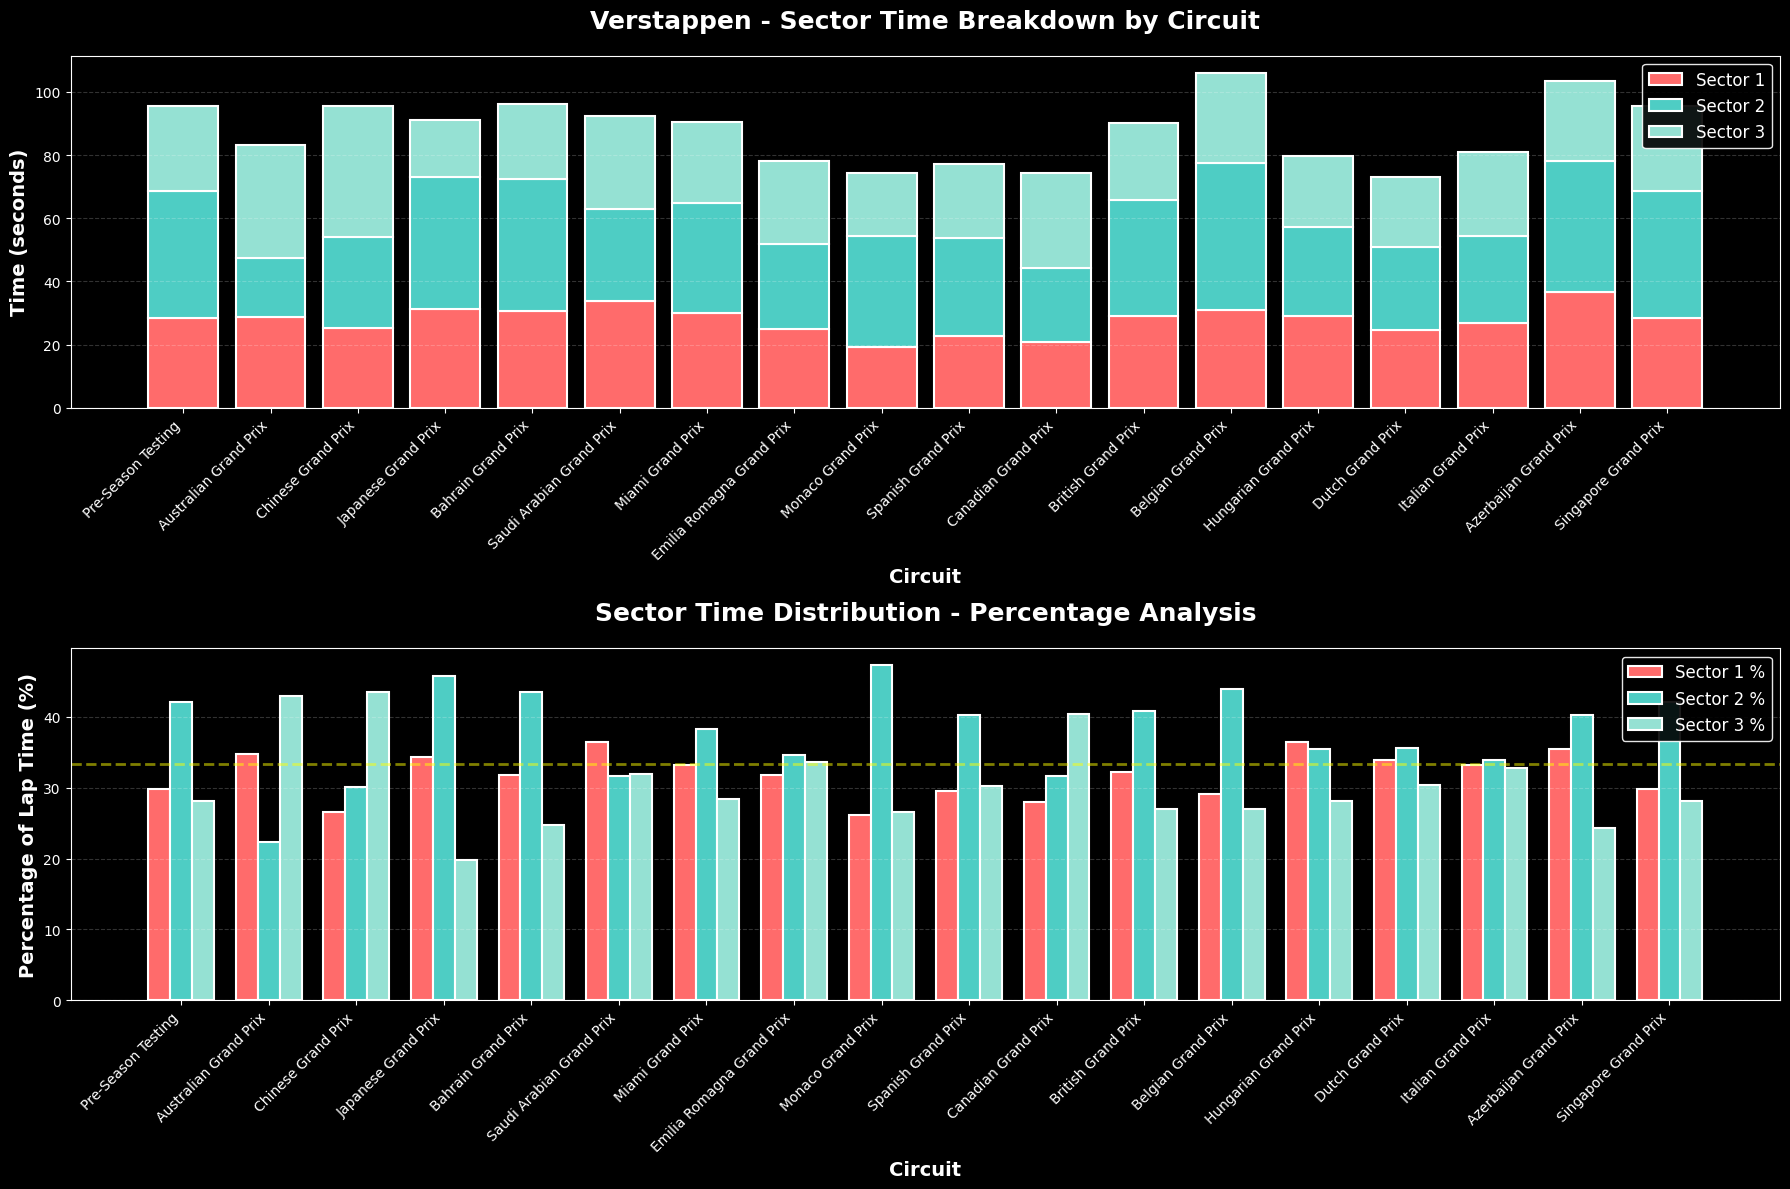

In [88]:
# Collect sector times data for detailed analysis
sector_data = []

for race_name in all_telemetry_data.keys():
    try:
        # Get the lap data from stored telemetry
        lap_info = all_telemetry_data[race_name]['lap']
        
        # Extract sector times
        sector_data.append({
            'Race': race_name,
            'Sector1': lap_info['Sector1Time'].total_seconds() if pd.notna(lap_info['Sector1Time']) else None,
            'Sector2': lap_info['Sector2Time'].total_seconds() if pd.notna(lap_info['Sector2Time']) else None,
            'Sector3': lap_info['Sector3Time'].total_seconds() if pd.notna(lap_info['Sector3Time']) else None,
        })
        
    except Exception as e:
        print(f"⚠ Could not extract sector data for {race_name}: {str(e)}")
        continue

df_sectors = pd.DataFrame(sector_data)
df_sectors = df_sectors.dropna()  # Remove races without sector data

if len(df_sectors) > 0:
    # Create sector analysis visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), facecolor='black')
    
    # Plot 1: Stacked bar chart of sector times
    ax1.set_facecolor('black')
    
    races = df_sectors['Race']
    x_pos = np.arange(len(races))
    
    # Create stacked bars
    p1 = ax1.bar(x_pos, df_sectors['Sector1'], color='#FF6B6B', edgecolor='white', linewidth=1.5, label='Sector 1')
    p2 = ax1.bar(x_pos, df_sectors['Sector2'], bottom=df_sectors['Sector1'], 
                 color='#4ECDC4', edgecolor='white', linewidth=1.5, label='Sector 2')
    p3 = ax1.bar(x_pos, df_sectors['Sector3'], 
                 bottom=df_sectors['Sector1'] + df_sectors['Sector2'],
                 color='#95E1D3', edgecolor='white', linewidth=1.5, label='Sector 3')
    
    ax1.set_xlabel('Circuit', fontsize=14, color='white', fontweight='bold')
    ax1.set_ylabel('Time (seconds)', fontsize=14, color='white', fontweight='bold')
    ax1.set_title('Verstappen - Sector Time Breakdown by Circuit', 
                  fontsize=18, color='white', fontweight='bold', pad=20)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(races, rotation=45, ha='right', fontsize=10, color='white')
    ax1.tick_params(colors='white', labelsize=10)
    ax1.legend(loc='upper right', facecolor='black', edgecolor='white', 
               labelcolor='white', fontsize=12, framealpha=0.9)
    ax1.grid(True, alpha=0.2, color='white', linestyle='--', axis='y')
    
    for spine in ax1.spines.values():
        spine.set_color('white')
    
    # Plot 2: Sector comparison heatmap
    ax2.set_facecolor('black')
    
    # Normalize sector times for comparison (as percentage of total lap time)
    df_sectors['TotalTime'] = df_sectors['Sector1'] + df_sectors['Sector2'] + df_sectors['Sector3']
    df_sectors['S1_Pct'] = (df_sectors['Sector1'] / df_sectors['TotalTime']) * 100
    df_sectors['S2_Pct'] = (df_sectors['Sector2'] / df_sectors['TotalTime']) * 100
    df_sectors['S3_Pct'] = (df_sectors['Sector3'] / df_sectors['TotalTime']) * 100
    
    # Create grouped bar chart for percentage comparison
    width = 0.25
    x_pos2 = np.arange(len(races))
    
    ax2.bar(x_pos2 - width, df_sectors['S1_Pct'], width, color='#FF6B6B', 
            edgecolor='white', linewidth=1.5, label='Sector 1 %')
    ax2.bar(x_pos2, df_sectors['S2_Pct'], width, color='#4ECDC4', 
            edgecolor='white', linewidth=1.5, label='Sector 2 %')
    ax2.bar(x_pos2 + width, df_sectors['S3_Pct'], width, color='#95E1D3', 
            edgecolor='white', linewidth=1.5, label='Sector 3 %')
    
    ax2.set_xlabel('Circuit', fontsize=14, color='white', fontweight='bold')
    ax2.set_ylabel('Percentage of Lap Time (%)', fontsize=14, color='white', fontweight='bold')
    ax2.set_title('Sector Time Distribution - Percentage Analysis', 
                  fontsize=18, color='white', fontweight='bold', pad=20)
    ax2.set_xticks(x_pos2)
    ax2.set_xticklabels(races, rotation=45, ha='right', fontsize=10, color='white')
    ax2.tick_params(colors='white', labelsize=10)
    ax2.legend(loc='upper right', facecolor='black', edgecolor='white', 
               labelcolor='white', fontsize=12, framealpha=0.9)
    ax2.grid(True, alpha=0.2, color='white', linestyle='--', axis='y')
    ax2.axhline(y=33.33, color='yellow', linestyle='--', linewidth=2, alpha=0.5, label='33.33% Reference')
    
    for spine in ax2.spines.values():
        spine.set_color('white')
    
    plt.tight_layout()
    plt.show()
else:
    print("No Data")

## Visualization 5: Consistency Analysis

Race-to-race performance variability showing championship-winning consistency.

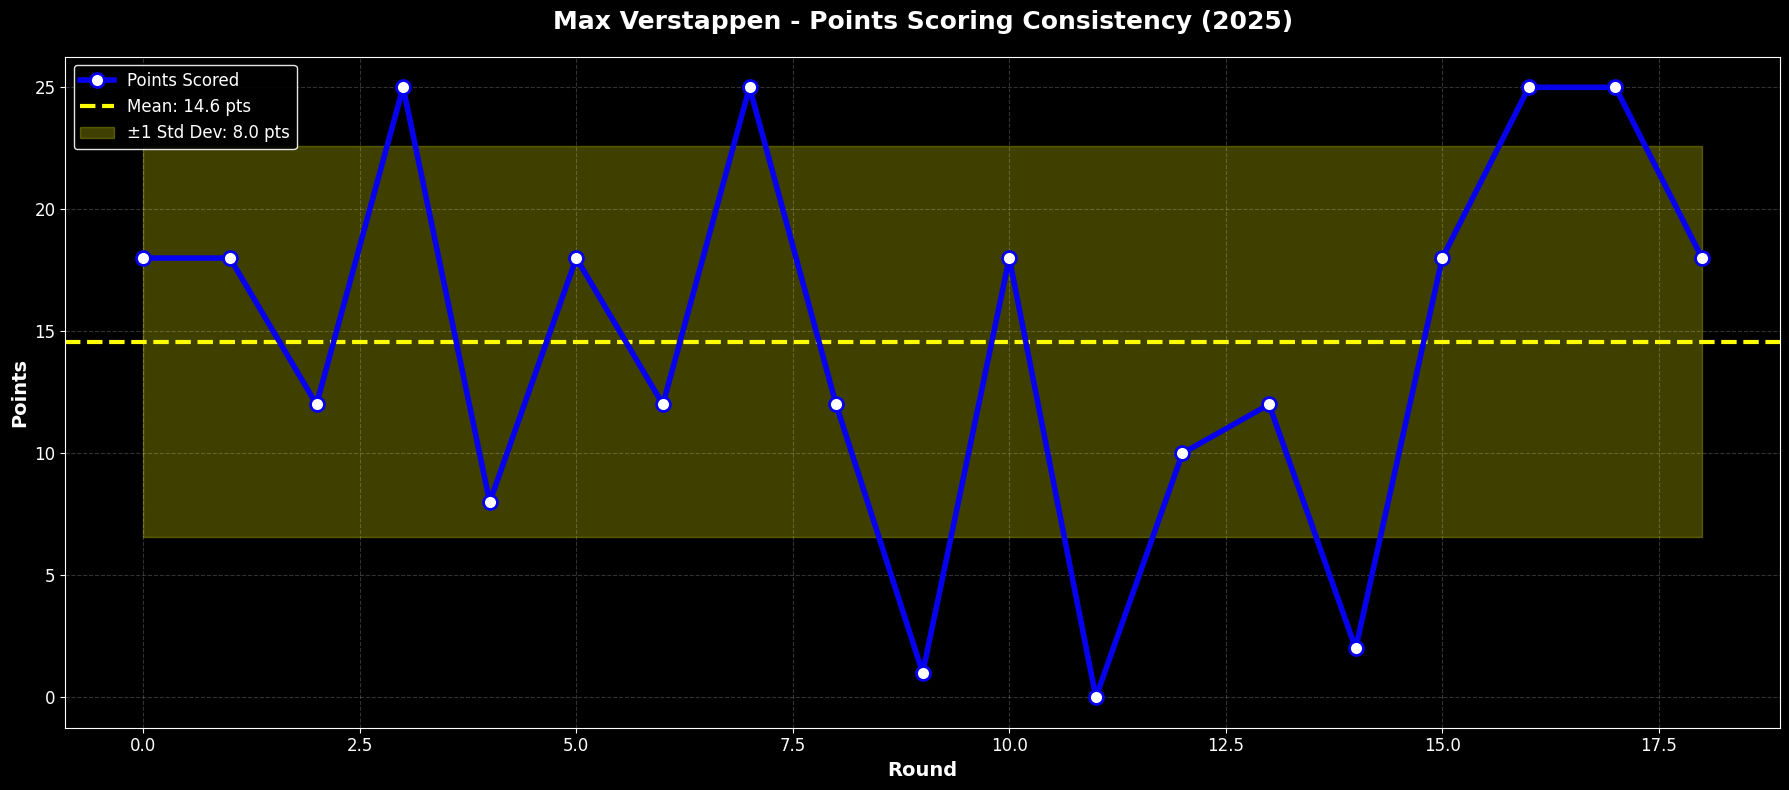

In [89]:
# Points Scoring Consistency - Line chart with mean and standard deviation
fig, ax = plt.subplots(figsize=(18, 8), facecolor='black')
ax.set_facecolor('black')

# Calculate statistics
points_per_race = df_verstappen['Points'].values
points_std = df_verstappen['Points'].std()
points_mean = df_verstappen['Points'].mean()

# Plot points per race
ax.plot(df_verstappen['Round'], df_verstappen['Points'], 
         color='#0600EF', linewidth=4, marker='o', markersize=10,
         markerfacecolor='white', markeredgecolor='#0600EF', markeredgewidth=2,
         label='Points Scored', zorder=3)

# Add mean line
ax.axhline(y=points_mean, color='yellow', linestyle='--', linewidth=3, 
           label=f'Mean: {points_mean:.1f} pts', zorder=2)

# Add standard deviation band
ax.fill_between(df_verstappen['Round'], 
                 points_mean - points_std, 
                 points_mean + points_std,
                 alpha=0.25, color='yellow', 
                 label=f'±1 Std Dev: {points_std:.1f} pts', zorder=1)

ax.set_xlabel('Round', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('Points', fontsize=14, color='white', fontweight='bold')
ax.set_title('Max Verstappen - Points Scoring Consistency (2025)', 
             fontsize=18, color='white', fontweight='bold', pad=20)
ax.grid(True, alpha=0.2, color='white', linestyle='--')
ax.tick_params(colors='white', labelsize=12)
ax.legend(loc='upper left', facecolor='black', edgecolor='white', 
          labelcolor='white', fontsize=12, framealpha=0.9)

for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.show()


In [90]:
# Consistency Metrics - Complete statistical summary
positions = df_verstappen['Position'].values
position_mean = df_verstappen['Position'].mean()

points_per_race = df_verstappen['Points'].values
points_std = df_verstappen['Points'].std()
points_mean = df_verstappen['Points'].mean()

# Grid position analysis
df_grid_analysis = df_verstappen[df_verstappen['GridPosition'].notna()].copy()
df_grid_analysis['PositionChange'] = df_grid_analysis['Position'] - df_grid_analysis['GridPosition']
position_change_mean = df_grid_analysis['PositionChange'].mean()

# Position change statistics
positions_gained = len(df_grid_analysis[df_grid_analysis['PositionChange'] < 0])
positions_lost = len(df_grid_analysis[df_grid_analysis['PositionChange'] > 0])
positions_maintained = len(df_grid_analysis[df_grid_analysis['PositionChange'] == 0])

# Calculate comprehensive consistency metrics
podium_consistency = (podiums / total_races * 100) if total_races > 0 else 0
top5_finishes = len(df_verstappen[df_verstappen['Position'] <= 5])
top5_consistency = (top5_finishes / total_races * 100) if total_races > 0 else 0

consistency_display = f"""
 MAX VERSTAPPEN - CONSISTENCY METRICS (2025)        
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
FINISHING POSITIONS
   • Average Finish:        P{position_mean:.2f}
   • Best Result:           P{int(positions.min())}
   • Worst Result:          P{int(positions.max())}
   • Median Position:       P{int(np.median(positions))}
RACE DAY PERFORMANCE
   • Positions Gained:      {positions_gained} races
   • Positions Lost:        {positions_lost} races
   • Same Position:         {positions_maintained} races
   • Avg Position Change:   {position_change_mean:+.2f}
POINTS CONSISTENCY
   • Average Points/Race:   {points_mean:.1f} pts
   • Points Std Dev:        {points_std:.2f} pts
   • Best Scoring:          {int(points_per_race.max())} pts
   • Worst Scoring:         {int(points_per_race.min())} pts
   • Total Points:          {int(df_verstappen['Points'].sum())} pts
RELIABILITY & SUCCESS RATE
   • Win Rate:              {(wins/total_races*100):.1f}% ({wins}/{total_races})
   • Podium Rate:           {podium_consistency:.1f}% ({podiums}/{total_races})
   • Top 5 Rate:            {top5_consistency:.1f}% ({top5_finishes}/{total_races})
   • Points Finish Rate:    {points_rate:.1f}% ({points_finishes}/{total_races})
   • DNF Rate:              {(dnfs/total_races*100):.1f}% ({dnfs}/{total_races})
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

print(consistency_display)


 MAX VERSTAPPEN - CONSISTENCY METRICS (2025)        
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
FINISHING POSITIONS
   • Average Finish:        P4.21
   • Best Result:           P1
   • Worst Result:          P18
   • Median Position:       P2
RACE DAY PERFORMANCE
   • Positions Gained:      4 races
   • Positions Lost:        6 races
   • Same Position:         9 races
   • Avg Position Change:   +1.21
POINTS CONSISTENCY
   • Average Points/Race:   14.6 pts
   • Points Std Dev:        8.00 pts
   • Best Scoring:          25 pts
   • Worst Scoring:         0 pts
   • Total Points:          277 pts
RELIABILITY & SUCCESS RATE
   • Win Rate:              21.1% (4/19)
   • Podium Rate:           52.6% (10/19)
   • Top 5 Rate:            78.9% (15/19)
   • Points Finish Rate:    94.7% (18/19)
   • DNF Rate:              5.3% (1/19)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

